# Primeiros contatos Regressão Linear

In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/DiogoWorkGit/Python_Notebooks/master/csv/mtcars.csv')

In [3]:
dados.head(10)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [5]:
dados.corr().style.background_gradient(cmap='coolwarm')

<ipython-input-5-735f444e303a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados.corr().style.background_gradient(cmap='coolwarm')


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


<Axes: xlabel='mpg', ylabel='wt'>

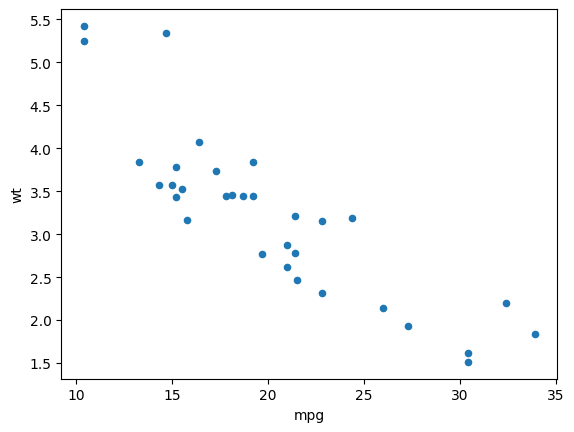

In [6]:
dados.plot(kind='scatter', x= 'mpg', y= 'wt')

In [22]:
x = dados[['wt']]
y = dados['mpg']

# Análise de regressão
mod = LinearRegression()
mod.fit(x,y)

# Valor R2
print(mod.score(x,y))

0.7528327936582646


In [41]:
# Visualização das estatísticas da regressão
mod_sm = sm.OLS(y,x).fit()
print(mod_sm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.720
Model:                            OLS   Adj. R-squared (uncentered):              0.711
Method:                 Least Squares   F-statistic:                              79.58
Date:                Wed, 13 Mar 2024   Prob (F-statistic):                    4.55e-10
Time:                        02:27:33   Log-Likelihood:                         -122.40
No. Observations:                  32   AIC:                                      246.8
Df Residuals:                      31   BIC:                                      248.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<ipython-input-30-8c1cb58ee736>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dados_Plot = dados_Plot.append(dados_fit)


<Axes: xlabel='wt', ylabel='mpg'>

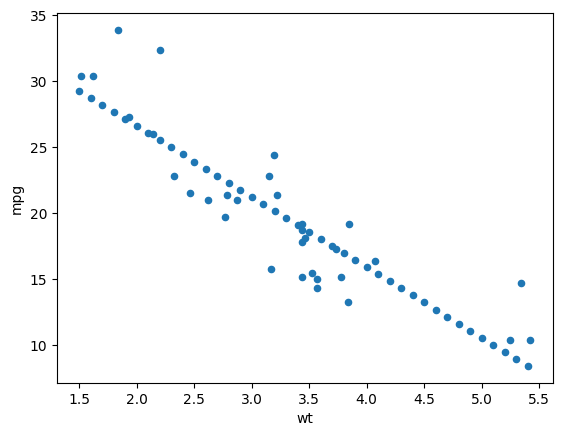

In [30]:
#Visualização da reta de regressão que representa o comportamento da correlação
dados_Plot = x.copy(deep=True)
dados_Plot['mpg'] = y

x_fit = np.arange(1.5, 5.5, 0.1)
dados_fit = pd.DataFrame( {'wt':x_fit} )

y_fit = mod.predict(dados_fit)

dados_fit['mpg'] = y_fit

dados_Plot = dados_Plot.append(dados_fit)

dados_Plot.plot(kind= 'scatter', x='wt', y='mpg')


# Exercios para praticar

Crie uma tabela com os valores de acordo com os valores X e Y para cada modelo

***

|Modelo|R^2|p-valor|Erro(treino)|
|---|---|---|---|
|mpg ~ wt||||
|mpg ~ wt + cyl||||
|mpg ~ wt + cyl + am||||
|mpg ~ hp + cyl + am||||
|mpg ~ hp + am + disp + qsec||||
|mpg ~ wt + hp + am + disp + qsec||||
|mpg ~ wt + hp + am + disp + cyl||||



In [64]:
modelos, valor_r2, p_valores, erro_medio = [],[],[],[]

In [65]:
modelo = '"mpg ~ wt"'
x = dados[['wt']]
y = dados['mpg']

mod = LinearRegression()
mod.fit(x,y)

mod_sm = sm.OLS(y,x).fit()

r2 = round(mod.score(x,y), ndigits=3)
pvalor = round(mod_sm.pvalues[0], ndigits=3)
errostd = round(mod_sm.bse[0], ndigits=3)

print(f'o modelo {modelo} tem o valor R^2: {r2}')
print(f'o modelo {modelo} tem o P-Valor: {pvalor}')
print(f'o modelo {modelo} tem o valor de Erro Médio: {errostd}')

modelos.append(modelo)
valor_r2.append(r2)
p_valores.append(pvalor)
erro_medio.append(errostd)

o modelo "mpg ~ wt" tem o valor R^2: 0.753
o modelo "mpg ~ wt" tem o P-Valor: 0.0
o modelo "mpg ~ wt" tem o valor de Erro Médio: 0.593


In [66]:
modelo = '"mpg ~ wt + cyl"'
x = dados[['wt', 'cyl']]
y = dados['mpg']

mod = LinearRegression()
mod.fit(x,y)

mod_sm = sm.OLS(y,x).fit()

r2 = round(mod.score(x,y), ndigits=3)
pvalor = round(mod_sm.pvalues[0], ndigits=3)
errostd = round(mod_sm.bse[0], ndigits=3)

print(f'o modelo {modelo} tem o valor R^2: {r2}')
print(f'o modelo {modelo} tem o P-Valor: {pvalor}')
print(f'o modelo {modelo} tem o valor de Erro Médio: {errostd}')

modelos.append(modelo)
valor_r2.append(r2)
p_valores.append(pvalor)
erro_medio.append(errostd)

o modelo "mpg ~ wt + cyl" tem o valor R^2: 0.83
o modelo "mpg ~ wt + cyl" tem o P-Valor: 0.715
o modelo "mpg ~ wt + cyl" tem o valor de Erro Médio: 3.18


In [67]:
modelo = '"mpg ~ wt + cyl + am"'
x = dados[['wt', 'cyl', 'am']]
y = dados['mpg']

mod = LinearRegression()
mod.fit(x,y)

mod_sm = sm.OLS(y,x).fit()

r2 = round(mod.score(x,y), ndigits=3)
pvalor = round(mod_sm.pvalues[0], ndigits=3)
errostd = round(mod_sm.bse[0], ndigits=3)

print(f'o modelo {modelo} tem o valor R^2: {r2}')
print(f'o modelo {modelo} tem o P-Valor: {pvalor}')
print(f'o modelo {modelo} tem o valor de Erro Médio: {errostd}')

modelos.append(modelo)
valor_r2.append(r2)
p_valores.append(pvalor)
erro_medio.append(errostd)

o modelo "mpg ~ wt + cyl + am" tem o valor R^2: 0.83
o modelo "mpg ~ wt + cyl + am" tem o P-Valor: 0.071
o modelo "mpg ~ wt + cyl + am" tem o valor de Erro Médio: 2.254


In [68]:
modelo = '"mpg ~ hp + cyl + am"'
x = dados[['hp', 'cyl', 'am']]
y = dados['mpg']

mod = LinearRegression()
mod.fit(x,y)

mod_sm = sm.OLS(y,x).fit()

r2 = round(mod.score(x,y), ndigits=3)
pvalor = round(mod_sm.pvalues[0], ndigits=3)
errostd = round(mod_sm.bse[0], ndigits=3)

print(f'o modelo {modelo} tem o valor R^2: {r2}')
print(f'o modelo {modelo} tem o P-Valor: {pvalor}')
print(f'o modelo {modelo} tem o valor de Erro Médio: {errostd}')

modelos.append(modelo)
valor_r2.append(r2)
p_valores.append(pvalor)
erro_medio.append(errostd)

o modelo "mpg ~ hp + cyl + am" tem o valor R^2: 0.804
o modelo "mpg ~ hp + cyl + am" tem o P-Valor: 0.0
o modelo "mpg ~ hp + cyl + am" tem o valor de Erro Médio: 0.028


In [69]:
modelo = '"mpg ~ hp + am + disp + qsec"'
x = dados[['hp', 'am', 'disp', 'qsec']]
y = dados['mpg']

mod = LinearRegression()
mod.fit(x,y)

mod_sm = sm.OLS(y,x).fit()

r2 = round(mod.score(x,y), ndigits=3)
pvalor = round(mod_sm.pvalues[0], ndigits=3)
errostd = round(mod_sm.bse[0], ndigits=3)

print(f'o modelo {modelo} tem o valor R^2: {r2}')
print(f'o modelo {modelo} tem o P-Valor: {pvalor}')
print(f'o modelo {modelo} tem o valor de Erro Médio: {errostd}')

modelos.append(modelo)
valor_r2.append(r2)
p_valores.append(pvalor)
erro_medio.append(errostd)

o modelo "mpg ~ hp + am + disp + qsec" tem o valor R^2: 0.802
o modelo "mpg ~ hp + am + disp + qsec" tem o P-Valor: 0.184
o modelo "mpg ~ hp + am + disp + qsec" tem o valor de Erro Médio: 0.014


In [70]:
modelo = '"mpg ~ wt + hp + am + disp + qsec"'
x = dados[['wt', 'hp', 'am', 'disp', 'qsec']]
y = dados['mpg']

mod = LinearRegression()
mod.fit(x,y)

mod_sm = sm.OLS(y,x).fit()

r2 = round(mod.score(x,y), ndigits=3)
pvalor = round(mod_sm.pvalues[0], ndigits=3)
errostd = round(mod_sm.bse[0], ndigits=3)

print(f'o modelo {modelo} tem o valor R^2: {r2}')
print(f'o modelo {modelo} tem o P-Valor: {pvalor}')
print(f'o modelo {modelo} tem o valor de Erro Médio: {errostd}')

modelos.append(modelo)
valor_r2.append(r2)
p_valores.append(pvalor)
erro_medio.append(errostd)

o modelo "mpg ~ wt + hp + am + disp + qsec" tem o valor R^2: 0.864
o modelo "mpg ~ wt + hp + am + disp + qsec" tem o P-Valor: 0.001
o modelo "mpg ~ wt + hp + am + disp + qsec" tem o valor de Erro Médio: 1.199


In [71]:
modelo = '"mpg ~ wt + hp + am + disp + qsec + cyl"'
x = dados[['wt', 'hp', 'am', 'disp', 'qsec', 'cyl']]
y = dados['mpg']

mod = LinearRegression()
mod.fit(x,y)

mod_sm = sm.OLS(y,x).fit()

r2 = round(mod.score(x,y), ndigits=3)
pvalor = round(mod_sm.pvalues[0], ndigits=3)
errostd = round(mod_sm.bse[0], ndigits=3)

print(f'o modelo {modelo} tem o valor R^2: {r2}')
print(f'o modelo {modelo} tem o P-Valor: {pvalor}')
print(f'o modelo {modelo} tem o valor de Erro Médio: {errostd}')

modelos.append(modelo)
valor_r2.append(r2)
p_valores.append(pvalor)
erro_medio.append(errostd)

o modelo "mpg ~ wt + hp + am + disp + qsec + cyl" tem o valor R^2: 0.866
o modelo "mpg ~ wt + hp + am + disp + qsec + cyl" tem o P-Valor: 0.001
o modelo "mpg ~ wt + hp + am + disp + qsec + cyl" tem o valor de Erro Médio: 1.217


In [75]:
df = pd.DataFrame ({
    'Modelos': modelos,
    'R^2': valor_r2,
    'p-valor': p_valores,
    'Erro(treino)': erro_medio
})

df

,Modelos,R^2,p-valor,Erro(treino)
0,"""mpg ~ wt""",0.753,0.000,0.593
1,"""mpg ~ wt + cyl""",0.830,0.715,3.180
2,"""mpg ~ wt + cyl + am""",0.830,0.071,2.254
3,"""mpg ~ hp + cyl + am""",0.804,0.000,0.028
4,"""mpg ~ hp + am + disp + qsec""",0.802,0.184,0.014
5,"""mpg ~ wt + hp + am + disp + qsec""",0.864,0.001,1.199
6,"""mpg ~ wt + hp + am + disp + qsec + cyl""",0.866,0.001,1.217
